In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json
from PIL import Image

In [2]:
base_dir='Medicinal plant dataset'

In [3]:
img_size=128
batch_size=12

In [4]:
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 4765 images belonging to 40 classes.


In [6]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 1180 images belonging to 40 classes.


In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [9]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
history =model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples// batch_size
)

Epoch 1/5
397/397 [==============================] - 199s 497ms/step - loss: 3.1934 - accuracy: 0.1502 - val_loss: 2.3910 - val_accuracy: 0.3163
Epoch 2/5
397/397 [==============================] - 145s 366ms/step - loss: 1.7455 - accuracy: 0.5028 - val_loss: 1.5994 - val_accuracy: 0.5153
Epoch 3/5
397/397 [==============================] - 128s 321ms/step - loss: 0.7016 - accuracy: 0.7968 - val_loss: 1.3987 - val_accuracy: 0.6054
Epoch 4/5
397/397 [==============================] - 124s 312ms/step - loss: 0.2023 - accuracy: 0.9461 - val_loss: 1.4749 - val_accuracy: 0.6616
Epoch 5/5
397/397 [==============================] - 121s 306ms/step - loss: 0.1007 - accuracy: 0.9756 - val_loss: 1.7181 - val_accuracy: 0.5952


In [11]:
print('Evaluating model...')
val_loss,val_accuracy = model.evaluate(validation_generator,steps=validation_generator.samples // batch_size)
print(f'Validation Accuracy:{val_accuracy * 100:.2f}%')

Evaluating model...


98/98 [==============================] - 8s 78ms/step - loss: 1.7191 - accuracy: 0.5944
Validation Accuracy:59.44%


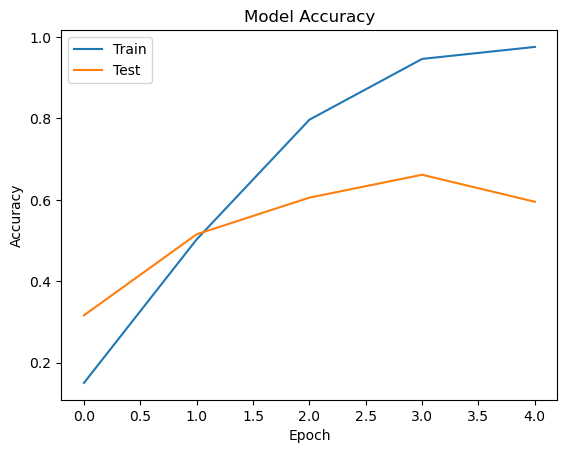

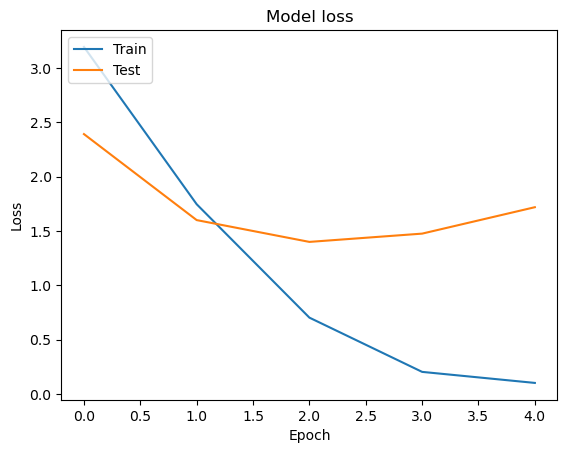

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [13]:
def load_and_preprocess_image(image_path,target_size=(128,128)):
    img=Image.open(image_path)
    img=img.resize(target_size)
    img_array=np.array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=img_array.astype('float32')/255.
    return img_array


In [14]:
def predict_image_class(model,image_path,class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index=np.argmax(predictions,axis=1)[0]
    predicted_class_name=class_indices[predicted_class_index]
    return predicted_class_name

In [15]:
class_indices={v:k for k, v in train_generator.class_indices.items()}

In [16]:
class_indices

{0: 'Aloevera',
 1: 'Amla',
 2: 'Amruta_Balli',
 3: 'Arali',
 4: 'Ashoka',
 5: 'Ashwagandha',
 6: 'Avacado',
 7: 'Bamboo',
 8: 'Basale',
 9: 'Betel',
 10: 'Betel_Nut',
 11: 'Brahmi',
 12: 'Castor',
 13: 'Curry_Leaf',
 14: 'Doddapatre',
 15: 'Ekka',
 16: 'Ganike',
 17: 'Gauva',
 18: 'Geranium',
 19: 'Henna',
 20: 'Hibiscus',
 21: 'Honge',
 22: 'Insulin',
 23: 'Jasmine',
 24: 'Lemon',
 25: 'Lemon_grass',
 26: 'Mango',
 27: 'Mint',
 28: 'Nagadali',
 29: 'Neem',
 30: 'Nithyapushpa',
 31: 'Nooni',
 32: 'Pappaya',
 33: 'Pepper',
 34: 'Pomegranate',
 35: 'Raktachandini',
 36: 'Rose',
 37: 'Sapota',
 38: 'Tulasi',
 39: 'Wood_sorel'}

In [17]:
json.dump(class_indices,open('class_indices.json','w'))

In [18]:
image_path='Medicinal plant dataset/Arali/352.jpg'
predicted_class_name=predict_image_class(model,image_path,class_indices)

print("Predicted class Name:",predicted_class_name)

1/1 [==============================] - 0s 203ms/step
Predicted class Name: Arali


In [21]:
model_version = 1
model.save("plant_detect1.keras")

In [20]:
pip show scipy

Name: scipyNote: you may need to restart the kernel to use updated packages.

Version: 1.11.1
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: 
Author-email: 
License: BSD
Location: c:\Users\Hp\anaconda5\Lib\site-packages
Requires: numpy
Required-by: datashader, gensim, imbalanced-learn, jax, scikit-image, scikit-learn, statsmodels
